<a href="https://colab.research.google.com/github/eledesma/EstadisticaICESI/blob/main/ejemplo_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis de componentes principales

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris # trayendo un dataset muy famoso
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [ ]:
# Cargar el dataset Iris como ejemplo
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
target = iris.target
target_names = iris.target_names

In [ ]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:

# Normalizar los datos para PCA
data_normalized = (data - data.mean()) / data.std()

# Aplicar PCA para reducir a 2 componentes principales
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_normalized) #fit -- entranamiento

# Crear un DataFrame con los resultados de PCA
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['target'] = target
pca_df['target_names'] = pca_df['target'].map({i: name for i, name in enumerate(target_names)})

In [ ]:
#Modelo para clasificar

# Tarea --

In [ ]:
data_normalized.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052


In [ ]:
pca_df.head(5)

,PC1,PC2,target,target_names
0,-2.257141,0.478424,0,setosa
1,-2.074013,-0.671883,0,setosa
2,-2.356335,-0.340766,0,setosa
3,-2.291707,-0.595400,0,setosa
4,-2.381863,0.644676,0,setosa


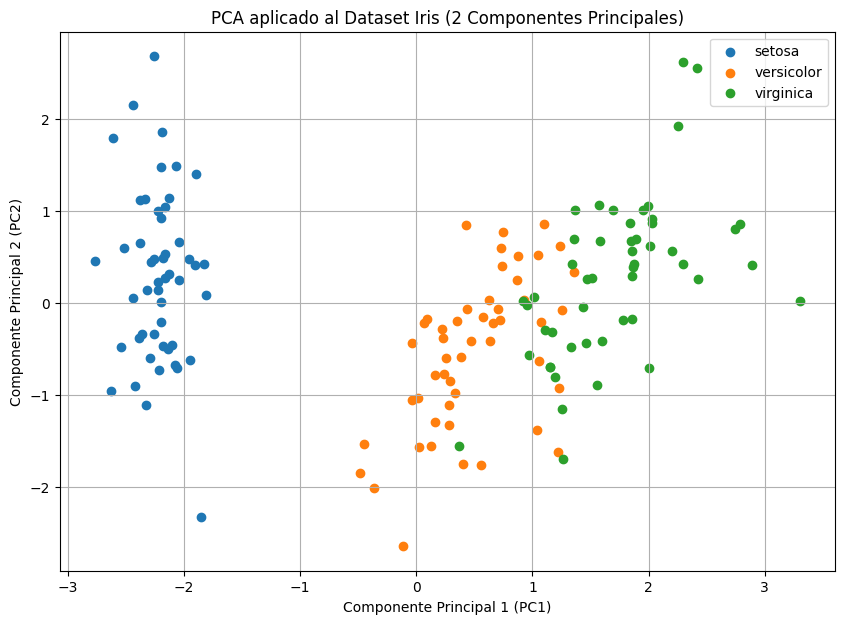

In [ ]:
# Graficar los resultados
plt.figure(figsize=(10, 7))
for target_value, target_name in enumerate(target_names):
    subset = pca_df[pca_df['target'] == target_value]
    plt.scatter(subset['PC1'], subset['PC2'], label=target_name)

plt.title("PCA aplicado al Dataset Iris (2 Componentes Principales)")
plt.xlabel("Componente Principal 1 (PC1)")
plt.ylabel("Componente Principal 2 (PC2)")
plt.legend()
plt.grid(True)
plt.show()